# Determine if the Bison Are Coming or Going

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import watershed
from skimage.color import label2rgb
import aux_functions as aux_func
from skimage.measure import regionprops, regionprops_table
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
def bison_label(mask, thresh):
    distance = cv2.distanceTransform(mask.astype(np.uint8), cv2.DIST_L2, 5)
    distance = aux_func.hminima(~distance.astype(np.uint8), thresh)
    bison_separated = watershed(distance)
    bison_separated[~mask] = 0
    for region in regionprops(bison_separated):
        if region.area < 2000:
            bison_separated[bison_separated == region.label] = 0

    return bison_separated

In [3]:
bison1 = cv2.imread("./images/bison1.jpg")
bison1 = cv2.cvtColor(bison1, cv2.COLOR_BGR2RGB)
bison1_mask = aux_func.bison_mask(bison1, (600, 900, 850, 1700))
bison1_label = bison_label(bison1_mask, 4)
bison1_rgb = label2rgb(bison1_label, image=bison1, bg_label=0)
for i in range(3):
    bison1_rgb[~bison1_mask, i] = bison1[~bison1_mask, i] / 255

bison2 = cv2.imread("./images/bison2.jpg")
bison2 = cv2.cvtColor(bison2, cv2.COLOR_BGR2RGB)
bison2_mask = aux_func.bison_mask(bison2, (600, 900, 800, 1650))
bison2_label = bison_label(bison2_mask, 4)
bison2_rgb = label2rgb(bison2_label, image=bison2, bg_label=0)
for i in range(3):
    bison2_rgb[~bison2_mask, i] = bison2[~bison2_mask, i] / 255

bison3 = cv2.imread("./images/bison3.jpg")
bison3 = cv2.cvtColor(bison3, cv2.COLOR_BGR2RGB)
bison3_mask = aux_func.bison_mask(bison3, (550, 850, 800, 1500))
bison3_label = bison_label(bison3_mask, 4)
bison3_rgb = label2rgb(bison3_label, image=bison3, bg_label=0)
for i in range(3):
    bison3_rgb[~bison3_mask, i] = bison3[~bison3_mask, i] / 255

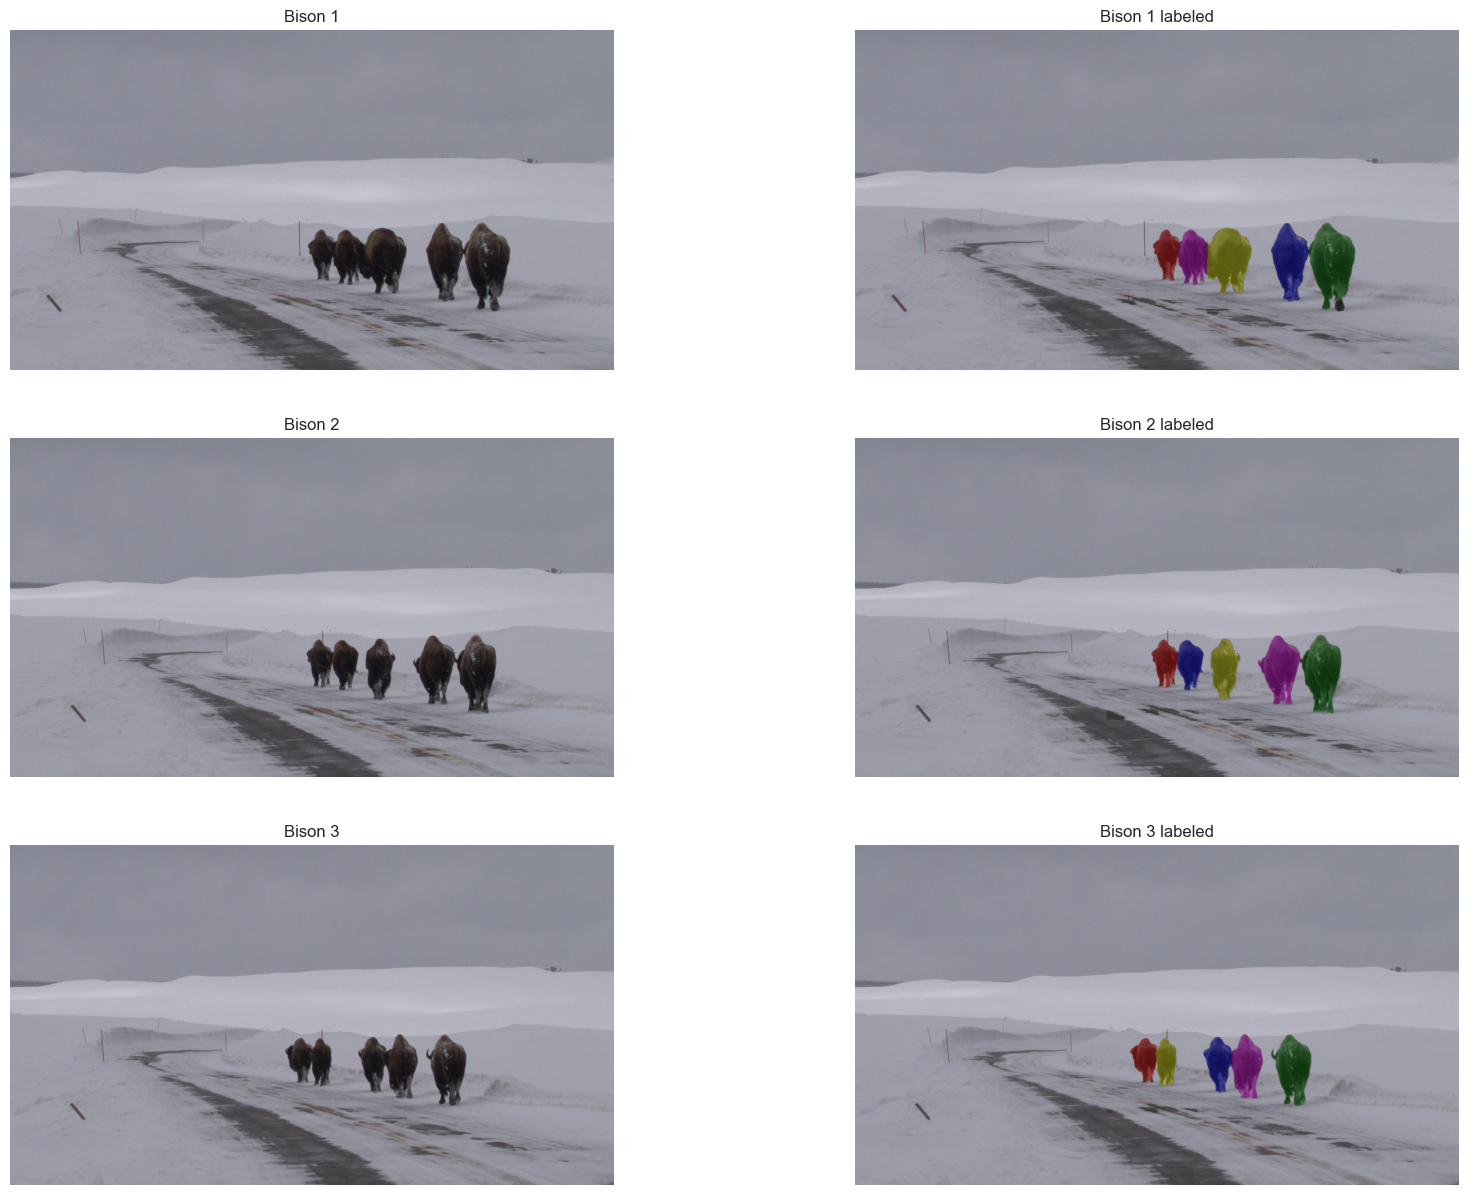

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
axs[0, 0].imshow(bison1)
axs[0, 0].set_title('Bison 1')
axs[0, 0].axis('off')
axs[1, 0].imshow(bison2)
axs[1, 0].set_title('Bison 2')
axs[1, 0].axis('off')
axs[2, 0].imshow(bison3)
axs[2, 0].set_title('Bison 3')
axs[2, 0].axis('off')
axs[0, 1].imshow(bison1_rgb)
axs[0, 1].set_title('Bison 1 labeled')
axs[0, 1].axis('off')
axs[1, 1].imshow(bison2_rgb)
axs[1, 1].set_title('Bison 2 labeled')
axs[1, 1].axis('off')
axs[2, 1].imshow(bison3_rgb)
axs[2, 1].set_title('Bison 3 labeled')
axs[2, 1].axis('off')
plt.show()

To take a measurement of labeled regions, we can use the [regionprops()](https://scikit-image.org/docs/stable/api/skimage.measure.html#regionprops) function. We can measure the height of the labeled regions with the "axis_major_length" property.

In [5]:
bison1_axs_mjr_lngth = []
for region in regionprops(bison1_label):
    bison1_axs_mjr_lngth.append(region.axis_major_length)

bison1_axs_mjr_lngth.sort()
bison1_axs_mjr_lngth = pd.DataFrame({'Axis Major Length Bison 1': bison1_axs_mjr_lngth})
bison1_axs_mjr_lngth

,Axis Major Length Bison 1
0,153.167154
1,165.806060
2,200.951043
3,235.361862
4,246.039121


In [6]:
bison2_axs_mjr_lngth = []
for region in regionprops(bison2_label):
    bison2_axs_mjr_lngth.append(region.axis_major_length)

bison2_axs_mjr_lngth.sort()
bison2_axs_mjr_lngth = pd.DataFrame({'Axis Major Length Bison 2': bison2_axs_mjr_lngth})
bison2_axs_mjr_lngth

,Axis Major Length Bison 2
0,148.278450
1,152.735909
2,187.920281
3,208.291433
4,237.801808


In [7]:
bison3_axs_mjr_lngth = []
for region in regionprops(bison3_label):
    bison3_axs_mjr_lngth.append(region.axis_major_length)

bison3_axs_mjr_lngth.sort()
bison3_axs_mjr_lngth = pd.DataFrame({'Axis Major Length Bison 3': bison3_axs_mjr_lngth})
bison3_axs_mjr_lngth

,Axis Major Length Bison 3
0,132.340448
1,151.429420
2,168.209197
3,197.174057
4,217.035327


In [8]:
bisons_axs_mjr_lngth = pd.concat([bison1_axs_mjr_lngth, bison2_axs_mjr_lngth, bison3_axs_mjr_lngth], axis=1)
bisons_axs_mjr_lngth

,Axis Major Length Bison 1,Axis Major Length Bison 2,Axis Major Length Bison 3
0,153.167154,148.278450,132.340448
1,165.806060,152.735909,151.429420
2,200.951043,187.920281,168.209197
3,235.361862,208.291433,197.174057
4,246.039121,237.801808,217.035327


Each column contains data from a frame, and each row contains data from a bison.

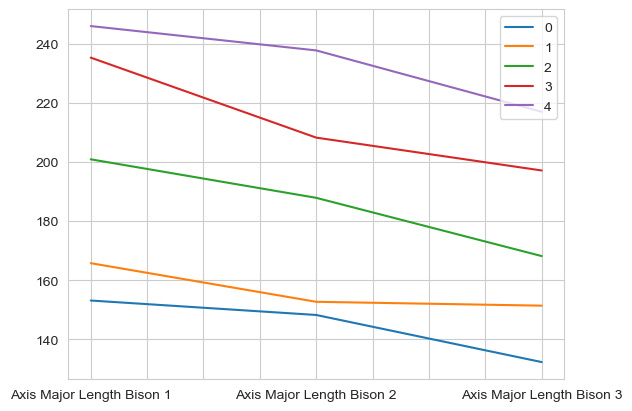

In [9]:
bisons_axs_mjr_lngth.T.plot()
plt.show()